<div style="text-align: center">
<b><font size=6>ChEn 3603 Homework 9 Problem 3
    </font></b>
</div>

<div class="alert alert-block alert-danger">

&copy; 2020 This material is copyright protected. Distributing this material in any form without written permission from Professor Sutherland is prohibited and may result in academic discipline.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
P   = 760 # total pressure, torr
p   = np.array([0, 30.0,  62.8,  85.4,  103.0]) # partial pressure, torr
xeq = np.array([0, 0.033, 0.072, 0.117, 0.171])  # liquid mole fraction
yeq = p/P  # vapor mole fraction

Xeq = xeq/(1-xeq)
Yeq = yeq/(1-yeq)

# Part (a) - Minimum $\frac{L^\prime}{V^\prime}$

We know $y_{N+1} = 0.15$ so we can find $Y_{N+1}=\frac{y_{N+1}}{1-y_{N+1}}.$
Likewise we know that $\alpha=0.95$ is the fraction of acetone recovered into the liquid. 
Therefore, the vapor balance for acetone is 
\begin{align}
    Y_{1}V^{\prime}	&=	(1-\alpha)Y_{N+1}V^{\prime} \\
    Y_{1}	&=	(1-\alpha)Y_{N+1}. 
\end{align}

In [3]:
alpha = 0.95  # percent recovery

ynp1 = 0.15             # 15 mole% acetone in air feed
Ynp1 = ynp1/(1-ynp1)    # mole ratio of acetone in air feed
Y1   = (1-alpha) * Ynp1 # recovered acetone
X0   = 0                # no acetone in the feed water

print('Y1 = {:.4f}'.format(Y1))

Y1 = 0.0088


The figure below shows the equilibrium data for $Y$ vs $X$ with $y=\frac{p_{s}}{P},$ and the operating line which shows the minimum operating condition,
$$
    \boxed{ \left. \frac{L^{\prime}}{V^{\prime}} \right|_{\min} \approx 1.0 }
$$
This is obtained when the operating line intersects the equilibrium line at $Y_{n+1}$.

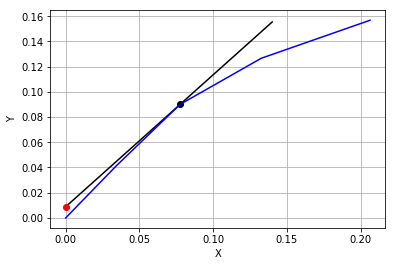


L'/V' = 1.0



In [4]:
pt = 2   # <------- change this until you get the tangent line below.

slope = ( Yeq[pt] - Y1 ) / ( Xeq[pt] - X0 )

plt.plot(Xeq[pt],Yeq[pt],'ko')
plt.plot([X0,0.14],[Y1,slope*0.14+Y1],'k-')

plt.plot(Xeq,Yeq,'b-')
plt.plot(X0,Y1,'ro')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

print('\nL\'/V\' = {:.1f}\n'.format(slope))

Note that we have augmented the equilibrium data with the point (X,Y)=(0,0), which always must be true. 

# Part (b)

The operating line is 
$$
    Y_{n+1}=\left(X_{n}-X_{0}\right)\frac{L^{\prime}}{V^{\prime}}+Y_{1}. 
$$
Solving for $X_{N}$, we obtain
$$
    X_{N} = \left(Y_{N+1}-Y_{1}\right)\left(\frac{L^{\prime}}{V^{\prime}}\right)^{-1}+X_{0}
$$
The two points $(X_{0},Y_{1})$ and $(X_{N},Y_{N+1})$ form the two ends of our operating line. 
For $\frac{L^{\prime}}{V^{\prime}}\left. = 1.25 \frac{L^{\prime}}{V^{\prime}}\right|_{\min}=1.25,$ we obtain the results shown in the figure below, 


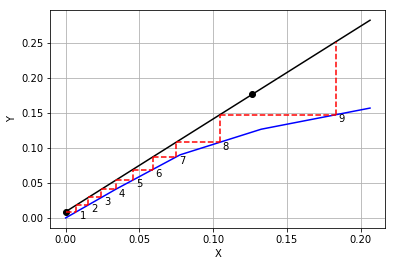

9 equilibrium stages are required


In [5]:
LVmin = 1.06

LV = 1.25 * LVmin

Xn = (Ynp1-Y1)/LV + X0

Yop = lambda X: ( X - X0 )*LV + Y1

Xop = np.linspace(X0,max(Xeq))
plt.plot(Xeq,Yeq,'b-')
plt.plot(Xop,Yop(Xop),'k-')
plt.plot(X0,Y1,'ko')
plt.plot(Xn,Ynp1,'ko')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

done = False

X = X0
Y = Yop(X)
stage = 0
while not done:
    
    stage += 1

    # step over to the equilibrium curve
    Xnew = np.interp( Y, Yeq, Xeq )
    
    # step up
    Ynew = Yop(Xnew)

    plt.plot([X,Xnew],[Y,Y],'r--')
    plt.plot([Xnew,Xnew],[Y,Ynew],'r--')
    plt.text(Xnew+0.002,Y-0.01,stage)
    
    X = Xnew
    Y = Ynew
    
    if X >= Xn:
        done = True
            
plt.show()

print('{:d} equilibrium stages are required'.format(stage))

# Part (c)
Recall that $x=\frac{X}{1+X}$.

In [6]:
x = X/(1+X)
print('X = {:.3f}\nx = {:.3f}\n'.format(X,x))
print('Acetone mole fraction in liquid effluent = {:.3f}'.format(x))

X = 0.183
x = 0.155

Acetone mole fraction in liquid effluent = 0.155
